# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [5]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Нібір даних складається з 10866 рядків та 19 колонок. В кожному рядку даних міститься погодинна інформація.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [6]:
date_count = df.groupby(['date'])['count'].sum()
date_count

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 456, dtype: int64

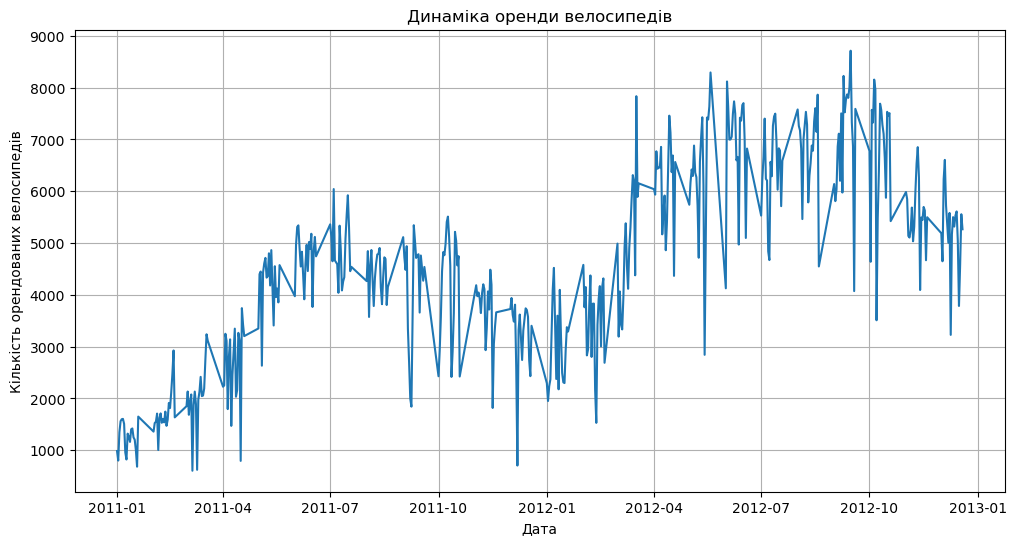

In [7]:
date_count.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

Оскільки графік побудований на поденних даних, то це і є умовою виникнення "заломів". Кожен день дані можуть значно коливатись і на це впливає день тижня, чи святковий цей день або вихідний, а також погодні умови. Для уникнення цього можна зробити потижневе або помісячне групування даних.
На графіку видно загальну тенденцію зростання кількості орендованих велосипедів, а також сезонну тенденцію зростання влітку и спаду взимку.
Також на графіку можна побачити наявність аномально низьких та високих значень. Низькі значення можуть бути зумовлені аномально холодною або дощовою погодою чи ці дні святкові, а високі - проведенням спортивхи заходів, теплою погодою, або це були вихідні дні.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [8]:
df['season'] = 'Q' + df['season'].astype(str)

In [9]:
season_count = df.groupby('season')['count'].mean().round(0)

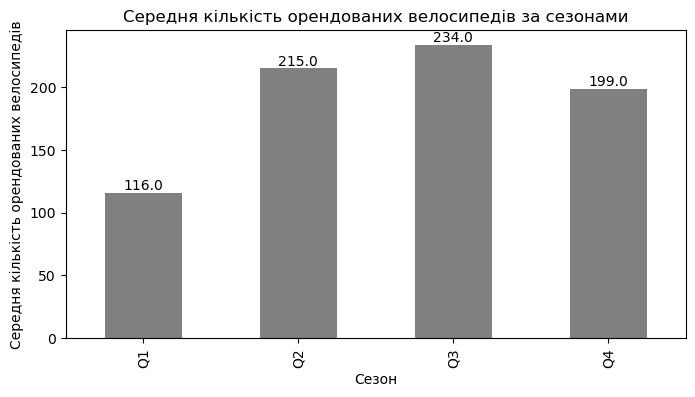

In [10]:
ax = season_count.plot.bar(
    figsize=(8, 4),
    color='grey',
    title='Середня кількість орендованих велосипедів за сезонами',
    ylabel='Середня кількість орендованих велосипедів',
    xlabel='Сезон',
)
for i, value in enumerate(season_count):
    ax.text(i, value, str(value), ha='center', va='bottom')

In [3]:
seasons = {12:'winter', 1:'winter', 2:'winter',
          3:'summer', 4:'summer', 5:'summer',
           6: 'monsoon', 7: 'monsoon', 8: 'monsoon', 9: 'monsoon',
           10: 'post-monsoon', 11: 'post-monsoon'
          }
df['weather_season_india'] = df['month'].map(seasons)

In [4]:
ordered_seasons = ['winter', 'summer', 'monsoon', 'post-monsoon']

df['weather_season_india'] = pd.Categorical(df['weather_season_india'], categories=ordered_seasons, ordered=True)

In [5]:
season_in_india_count = df.groupby('weather_season_india', observed=True)['count'].mean().round(0)

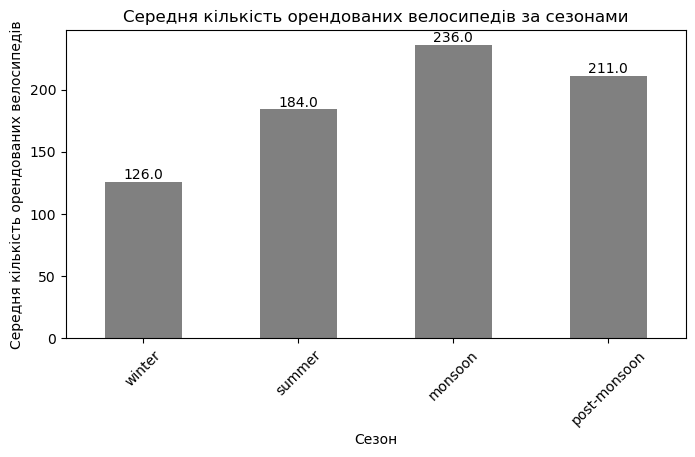

In [8]:
ax = season_in_india_count.plot.bar(
    figsize=(8, 4),
    color='grey',
    title='Середня кількість орендованих велосипедів за сезонами',
    ylabel='Середня кількість орендованих велосипедів',
    xlabel='Сезон',
)
for i, value in enumerate(season_in_india_count):
    ax.text(i, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45);

In [15]:
df.groupby(['season','weather'])['weather'].count()

season  weather
Q1      1          1759
        2           715
        3           211
        4             1
Q2      1          1801
        2           708
        3           224
Q3      1          1930
        2           604
        3           199
Q4      1          1702
        2           807
        3           225
Name: weather, dtype: int64

In [16]:
print(season_count[season_count.idxmax()] / season_count[season_count.idxmin()])
print(season_in_india_count[season_in_india_count.idxmax()] / season_in_india_count[season_in_india_count.idxmin()])

2.0172413793103448
1.873015873015873


Найбільша середня кількість орендованих велосипедів була у 3-му кварталі або у сезон "Monsoon".
Це обумовлено більш комфортним температурним режимом, а також меншою кількістю дощових та туманних днів.
Оренда велосипедів між найпопулярнішим та найменш популярним сезонами відрізняється майже в 2 рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


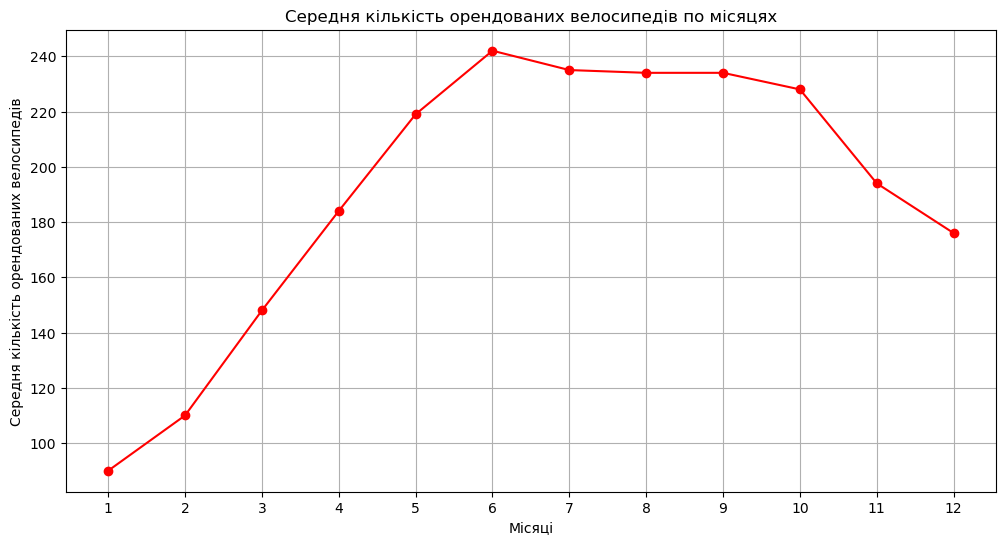

In [17]:
month_count = df.groupby('month')['count'].mean().round(0)

month_count.plot(
    figsize=(12, 6),
    title='Середня кількість орендованих велосипедів по місяцях',
    xlabel='Місяці',
    ylabel='Середня кількість орендованих велосипедів',
    marker='o',
    color='red',
    grid=True
)

plt.xticks(range(1, 13))
plt.show()

Пік оренди велосипедів припадає на 6-10 місяці, а осі напочатку року відзначається значний спад.
Ця закономірність повністю співпадає з даними з попереднього завдання.
Кліматичні умови напряму впливають на оренду велопипедів. Холод, туман, дощ зумовлюють спад оренди, а от тепла погода та гарна видимість впливають на її підвищення.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

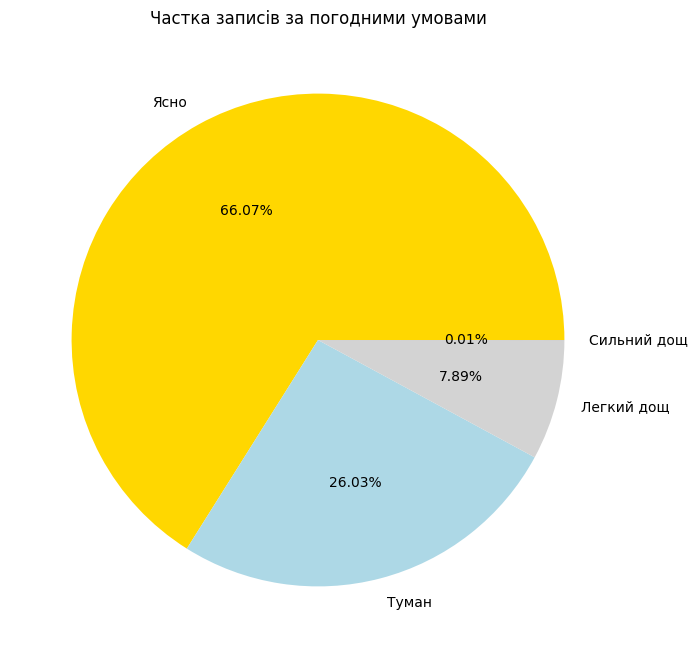

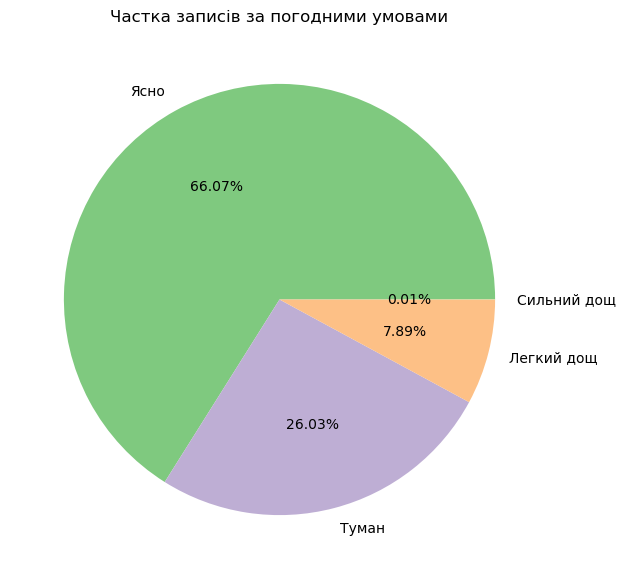

In [18]:
df.weather.value_counts().plot.pie(
    figsize=(7, 7),
    autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Частка записів за погодними умовами',
    ylabel='',
    colors=plt.cm.Accent.colors
);

В даному датасеті переважає ясна погода.
Були дні, коли був сильний дощ, але таких днів дуже мало, лише 0,01%.
Чим кращі погодні умови, тим вищий попит на оренду велосипедів.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

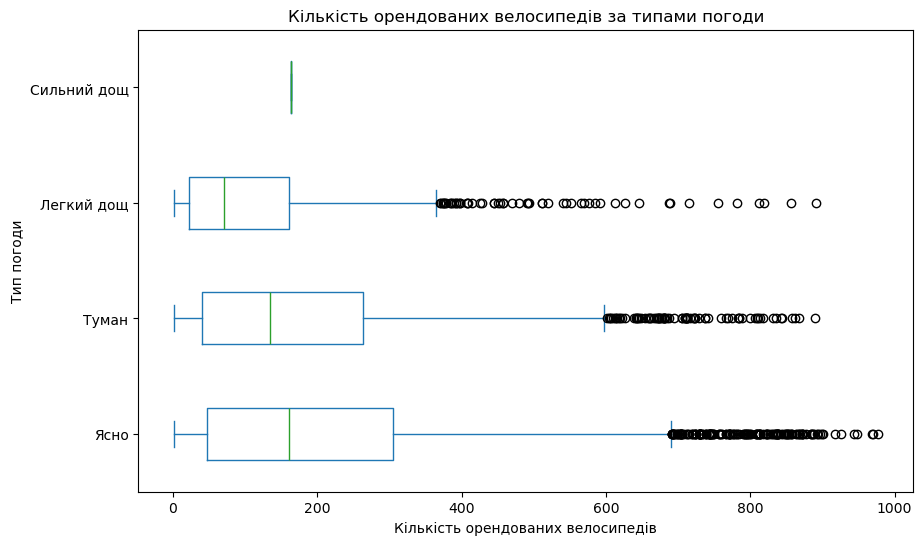

In [19]:
df[['weather', 'count']].plot.box(
    by='weather',
    figsize=(10, 6),
    grid = False,
    vert=False
)
plt.title('Кількість орендованих велосипедів за типами погоди')
plt.suptitle('')
plt.xlabel('Кількість орендованих велосипедів')
plt.ylabel('Тип погоди')
plt.yticks([1, 2, 3, 4], ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])

plt.show()

Найбільший розкид у кількості оренди спостерігається при ясній погоді.
Викиди даних спостерігаються при всіх типах погодних умов, окрім сильного дощу.
Медіанне значення оренди найвище при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

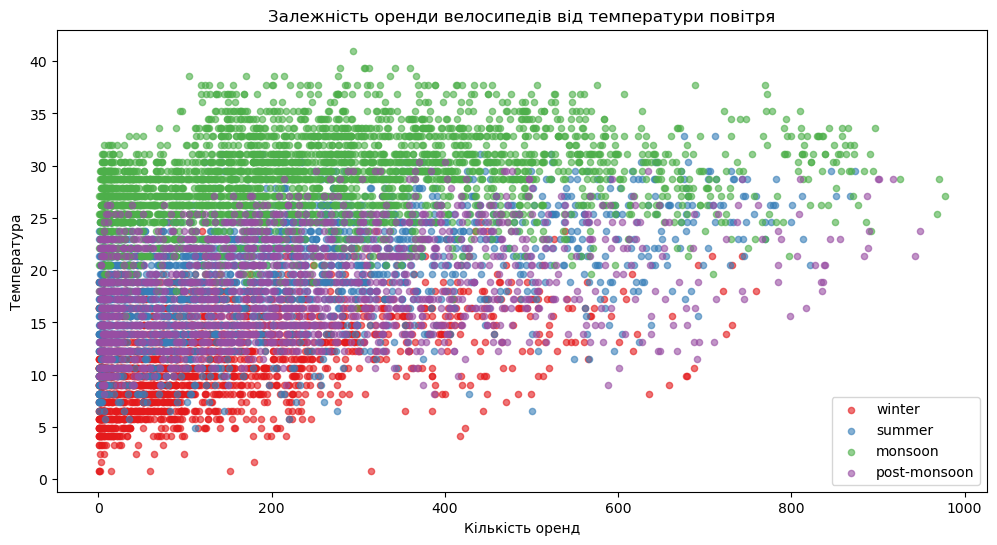

In [20]:
seasons = df['weather_season_india'].unique()
colors = plt.cm.Set1.colors

plt.figure(figsize=(12,6))

for i, season in enumerate(seasons):
    df[df['weather_season_india'] == season].plot.scatter(
        x='count',
        y='temp',
        color=colors[i % len(colors)],
        alpha=0.6,
        label=season,
        ax=plt.gca()
    )

plt.title('Залежність оренди велосипедів від температури повітря')
plt.xlabel('Кількість оренд')
plt.ylabel('Температура')
plt.legend(loc="lower right")
plt.show()

Між температурою та орендою простежується прямий зв'язок, хоча також спостерігається значний розкид даних.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [9]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_days, ordered=True)

In [10]:
avg_by_weekday = df.groupby('weekday', observed=False)[['casual', 'registered']].mean().round(0)

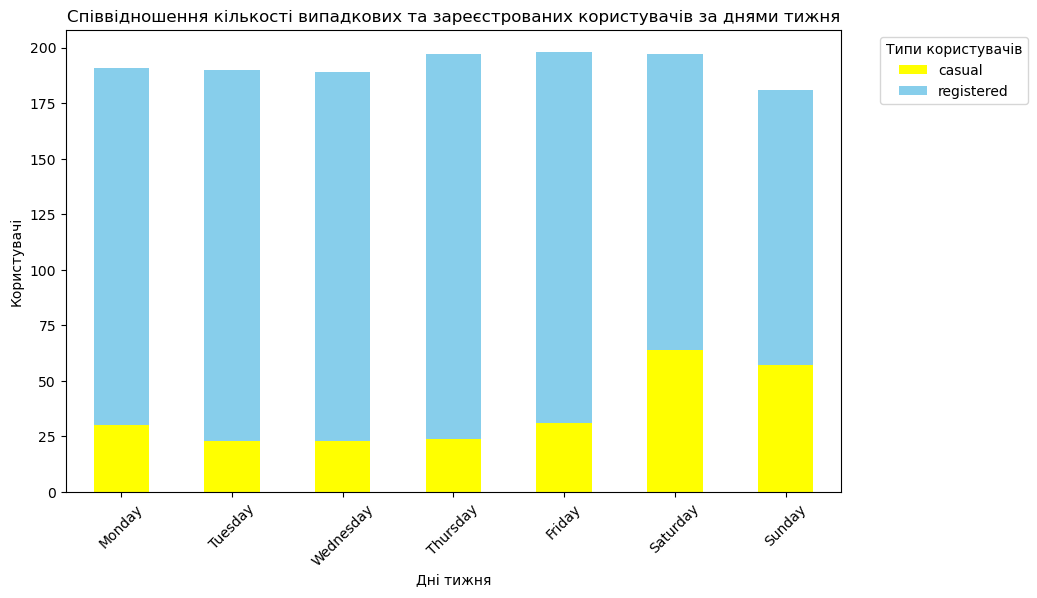

In [11]:
avg_by_weekday.plot.bar(
    figsize=(10, 6),
    title='Співвідношення кількості випадкових та зареєстрованих користувачів за днями тижня',
    ylabel='Користувачі',
    xlabel='Дні тижня',
    stacked=True,
    color=['yellow', 'skyblue']
)
plt.legend(title='Типи користувачів', bbox_to_anchor=(1.25, 1), loc="upper right")
plt.xticks(rotation=45)
plt.show()

В робочі дні спостерігається збільшення кількості оренд серед зареєстрованих користувачів. Це може бути пов'язане з довірою до перевіреного часом сервісу, а також з програмами лояльності для постійних клієнтів.